## Génération de la matrice de distances

In [2]:
from random import *
import pandas
from generateMatrix import generateMatrix

grapheTable = []
PointsLivraisonTable = []

#génération aléatoire des villes
DepartementTravail = randint(1,93)

#génération des matrices de degré différents
listeDegre = [10,20,30,40,50,65,80,100,120,140]

for degre in listeDegre:
    MatriceDistances, PointsLivraison = generateMatrix(DepartementTravail, degre)
    grapheTable.append(MatriceDistances)
    PointsLivraisonTable.append(PointsLivraison)

print(f"Choix du département pour la tournée : {str(DepartementTravail)}")

# Affichage de la matrice 140x140
pandas.DataFrame(grapheTable[0])

Choix du département pour la tournée : 60


,0,1,2,3,4,5,6,7,8,9
0,0,32,49,27,41,24,38,54,52,52
1,32,0,35,5,10,10,47,72,26,22
2,49,35,0,35,32,42,32,101,21,31
3,27,5,35,0,14,7,44,69,28,26
4,41,10,32,14,0,20,51,81,17,12
5,24,10,42,7,20,0,48,62,36,32
6,38,47,32,44,51,48,0,91,49,56
7,54,72,101,69,81,62,91,0,98,93
8,52,26,21,28,17,36,49,98,0,10
9,52,22,31,26,12,32,56,93,10,0


## I - Choix des algorithmes

In [5]:
#import algorithmes
from Algorithms.tabu import tabu_method
from Algorithms.genetic import genetic_method
from Algorithms.antColony import antColony_method
from generateMaps import generateMaps

# Variables partagés par tous les algorithmes
vehicules = 5

# Variables partagés entre l'algorithme tabou et l'algorithme genetique
maxIterations = 1

# Variables de l'algorithme génétique
mutationRate = 1
populationSize = 40
maxGen = 10000

# Vitesse moyenne camion
vitesseMoyenne = 80

print("---DONE---")

---DONE---


In [3]:
# Methode pour convertir un temps unitaire en heure et minute
def convertHeure(t):
    min = (t - int(t))
    t = t - min
    return [round(t), round(min * 60)]

# Methode pour afficher les résultats
def printer(route, dist):
    """ Affiche les résultats d'un algorithme """
    globalDist = 0
    globalTime = 0
    for i in range(len(route)):
        t = dist[i]/vitesseMoyenne
        time = convertHeure(t)
        print(f"camion {i+1} : {route[i+1]} || distance = {dist[i]} km || temps = {time[0]} h {time[1]} min")
        globalDist += dist[i]
        globalTime += t
    globalTime = convertHeure(globalTime)
    print(f"Total distance = {globalDist} km || Total temps = {globalTime[0]} h {globalTime[1]} min")
    print("\n")



## Tabou

In [10]:
tabu_route, tabu_dist = tabu_method(grapheTable[1], vehicules, maxIterations)
printer(tabu_route, tabu_dist)
# Décommenter le code ci-dessous pour avoir un carte avec la solution
generateMaps(tabu_route, PointsLivraisonTable[1], "tabu")

camion 1 : [0, 3, 4, 13, 16, 14, 19, 2, 0] || distance = 304 km || temps = 3 h 48 min
camion 2 : [0, 1, 6, 7, 9, 18, 12, 0] || distance = 175 km || temps = 2 h 11 min
camion 3 : [0, 17, 15, 10, 8, 11, 5, 0] || distance = 184 km || temps = 2 h 18 min
Total distance = 663 km || Total temps = 8 h 17 min




## Colonie de fourmis

In [49]:
ant_route, ant_dist = antColony_method(grapheTable[1], vehicules)
printer(ant_route, ant_dist)

# Décommenter le code ci-dessous pour avoir un carte avec la solution
# generateMaps(ant_route, PointsLivraisonTable[1], "antColony")

camion 1 : [0, 16, 15, 18, 10, 0] || distance = 223 km || temps = 2 h 47 min
camion 2 : [0, 9, 14, 13, 5, 0] || distance = 216 km || temps = 2 h 42 min
camion 3 : [0, 7, 3, 4, 2, 0] || distance = 163 km || temps = 2 h 2 min
camion 4 : [0, 12, 8, 17, 6, 0] || distance = 148 km || temps = 1 h 51 min
camion 5 : [0, 19, 1, 11, 0] || distance = 194 km || temps = 2 h 25 min
Total distance = 944 km || Total temps = 11 h 48 min




## Génétique

In [50]:
genetic_route, genetic_dist = genetic_method(mutationRate, populationSize, maxGen, maxIterations, vehicules, grapheTable[1])
printer(genetic_route, genetic_dist)

# Décommenter le code ci-dessous pour avoir un carte avec la solution
# generateMaps(genetic_route, PointsLivraisonTable[1], "genetic")

camion 1 : [0, 7, 18, 3, 12, 0] || distance = 140 km || temps = 1 h 45 min
camion 2 : [0, 15, 0] || distance = 160 km || temps = 2 h 0 min
camion 3 : [0, 14, 11, 0] || distance = 149 km || temps = 1 h 52 min
camion 4 : [0, 6, 8, 4, 2, 19, 10, 9, 17, 0] || distance = 149 km || temps = 1 h 52 min
camion 5 : [0, 16, 1, 13, 5, 0] || distance = 143 km || temps = 1 h 47 min
Total distance = 741 km || Total temps = 9 h 16 min




## Comparaison des performances des 3 algorithmes (Tabou, Colonie de fourmis, Génétique)

In [11]:
import time

#evaluation du temps d'exécution et du résultat
timeTabou = []
timeFourmi = []
timeGenetic = []
worstTabou = []
worstFourmi = []
worstGenetic = []

for graphe in grapheTable:
    #evaluation tabou
    t = time.process_time()
    tabu_route, tabu_dist = tabu_method(graphe, vehicules, maxIterations)
    elapsed_time = time.process_time() - t
    timeTabou.append(elapsed_time)
    worstTabou.append(max(tabu_dist))

    #evaluation colonie de fourmis
    t = time.process_time()
    ant_route, ant_dist = antColony_method(graphe, vehicules)
    elapsed_time = time.process_time() - t
    timeFourmi.append(elapsed_time)
    worstFourmi.append(max(ant_dist))
    
    #evaluation génétique
    t = time.process_time()
    genetic_route, genetic_dist = genetic_method(mutationRate, populationSize, maxGen, maxIterations, vehicules, graphe)
    elapsed_time = time.process_time() - t
    timeGenetic.append(elapsed_time)
    worstGenetic.append(max(genetic_dist))

print("---DONE---")

---DONE---


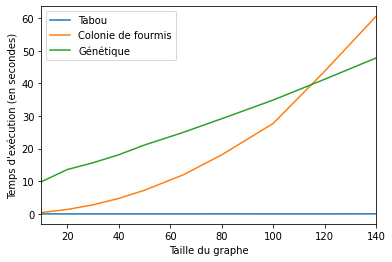

In [12]:
import matplotlib.pyplot as plt

#graphe temps d'exécution
plt.plot(listeDegre,timeTabou)
plt.plot(listeDegre,timeFourmi)
plt.plot(listeDegre,timeGenetic)

plt.legend(['Tabou', 'Colonie de fourmis', 'Génétique'])
plt.xlabel("Taille du graphe")
plt.ylabel("Temps d'exécution (en secondes)")
plt.xlim([10, 140])

plt.show()

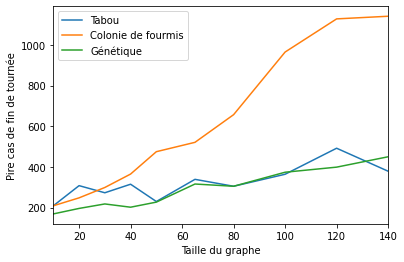

In [14]:
#graphe pire cas possible
plt.plot(listeDegre,worstTabou)
plt.plot(listeDegre,worstFourmi)
plt.plot(listeDegre,worstGenetic)

plt.legend(['Tabou', 'Colonie de fourmis', 'Génétique'])
plt.xlabel("Taille du graphe")
plt.ylabel("Pire cas de fin de tournée")
plt.xlim([10, 140])

plt.show()

## Algorithme heuristique de OR-Tools

In [11]:
from Algorithms.or_tools import ortool_method

ortools_heuristic_route, ortools_heuristic_dist = ortool_method(grapheTable[1], vehicules)
printer(ortools_heuristic_route, ortools_heuristic_dist)

# Décommenter le code ci-dessous pour avoir un carte avec la solution
generateMaps(ortools_heuristic_route, PointsLivraisonTable[1], "ortools_heuristic")

camion 1 : [0, 6, 2, 12, 18, 15, 17, 0] || distance = 168 km || temps = 2 h 6 min
camion 2 : [0, 16, 13, 4, 14, 0] || distance = 95 km || temps = 1 h 11 min
camion 3 : [0, 3, 9, 8, 10, 19, 5, 11, 7, 1, 0] || distance = 167 km || temps = 2 h 5 min
Total distance = 430 km || Total temps = 5 h 22 min




## Comparatif entre le tabou et la méthode heuristique de OR-Tools

In [10]:
import time
#evaluation du temps d'exécution et du résultat
Time_ortools = []
Time_tabu = []
Worst_ortools = []
Worst_tabu = []
TotalDistances_ortools = []
TotalDistances_tabu = []

for graphe in grapheTable:
    #evaluation tabou OR-Tools
    t = time.process_time()
    ortools_route, ortools_distance = ortool_method(graphe, vehicules, "default", time_limit)
    elapsed_time = time.process_time() - t
    Time_ortools.append(elapsed_time)
    Worst_ortools.append(max(ortools_distance))
    TotalDistances_ortools.append(ortools_distance)

    #evaluation tabou
    t = time.process_time()
    tabu_route, tabu_distance = tabu_method(graphe, vehicules, maxIterations)
    elapsed_time = time.process_time() - t
    Time_tabu.append(elapsed_time)
    Worst_tabu.append(max(tabu_distance))
    TotalDistances_tabu.append(tabu_distance)

print("---DONE---")

---DONE---


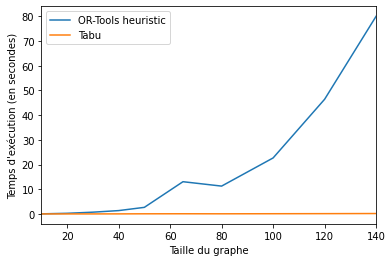

In [12]:
import matplotlib.pyplot as plt

#graphe temps d'exécution
plt.plot(listeDegre,Time_ortools)
plt.plot(listeDegre,Time_tabu)

plt.legend(['OR-Tools heuristic', 'Tabu'])
plt.xlabel("Taille du graphe")
plt.ylabel("Temps d'exécution (en secondes)")
plt.xlim([10, 140])

plt.show()

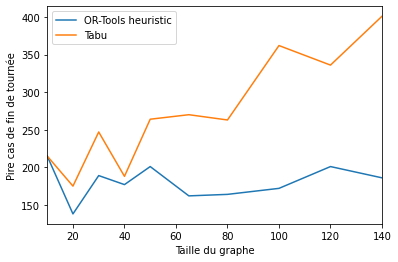

In [13]:
#graphe pire cas possible
plt.plot(listeDegre,Worst_ortools)
plt.plot(listeDegre,Worst_tabu)

plt.legend(['OR-Tools heuristic', 'Tabu'])
plt.xlabel("Taille du graphe")
plt.ylabel("Pire cas de fin de tournée")
plt.xlim([10, 140])

plt.show()

### Graphiques représentant la répartition de la distance de trajet entre chaque camions

#### I - Heuristique de OR-Tools

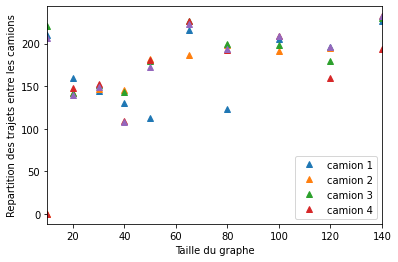

In [71]:
#graphe repartition camions
plt.plot(listeDegre, TotalDistances_ortools,"^")

plt.legend(['camion 1', 'camion 2', 'camion 3', 'camion 4'])
plt.xlabel("Taille du graphe")
plt.ylabel("Repartition des trajets entre les camions")
plt.xlim([10, 140])
plt.show()

#### II - Algorithme Tabou

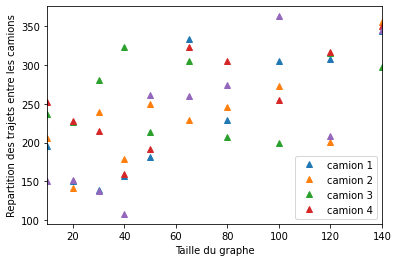

In [64]:
plt.plot(listeDegre, TotalDistances_tabu, "^")
plt.legend(['camion 1', 'camion 2', 'camion 3', 'camion 4'])
plt.xlabel("Taille du graphe")
plt.ylabel("Repartition des trajets entre les camions")
plt.xlim([10, 140])
plt.show()

### Simulation réelle avec une contrainte de capacité


In [10]:
from Algorithms.or_tools_CVRP import ortool_CVRP_method

nb_vehicules = 3
# Nombre de colis a déposer par villes
deliveries = [4, 2, 1, 3, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 3, 2, 1, 3, 2, 1]
# Nombre de colis maximum par camions
camion_capacities = [15, 15, 15]

cvrp_route, cvrp_dist, cvrp_load = ortool_CVRP_method(grapheTable[1], nb_vehicules, deliveries, camion_capacities)
for i in range(nb_vehicules):
    t = cvrp_dist[i]/vitesseMoyenne
    T = convertHeure(t)
    print(f"Camion {i} : route = {cvrp_route[i+1]} | {cvrp_dist[i]} km parcourus en {T[0]} h {T[1]} min | capacitée maximale = {cvrp_load[i]}")

# Décommenter le code ci-dessous pour avoir un carte avec la solution
# generateMaps(cvrp_route, PointsLivraisonTable[1], "ortools_cvrp")

Camion 0 : route = [0, 15, 7, 14, 8, 5, 0] | 250 km parcourus en 3 h 8 min | capacitée maximale = 15
Camion 1 : route = [0, 17, 2, 12, 6, 1, 18, 0] | 152 km parcourus en 1 h 54 min | capacitée maximale = 15
Camion 2 : route = [0, 16, 4, 9, 3, 13, 19, 11, 10, 0] | 191 km parcourus en 2 h 23 min | capacitée maximale = 15
